<a href="https://colab.research.google.com/github/Chameleon-company/MOP-Code/blob/esha-2025/artificial-intelligence/T1_2025/T1_2025_Health_Behavior/dietary_monitoring_nutrition_ai/model_training_30class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("✅ Colab notebook is working!")


✅ Colab notebook is working!


In [ ]:
#downloading the Food-101 dataset
!wget --no-check-certificate https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvzf food-101.tar.gz


Streaming output truncated to the last 5000 lines.
food-101/images/chicken_wings/306910.jpg
food-101/images/chicken_wings/3769369.jpg
food-101/images/chicken_wings/1983372.jpg
food-101/images/chicken_wings/275226.jpg
food-101/images/chicken_wings/1349542.jpg
food-101/images/chicken_wings/1214920.jpg
food-101/images/chicken_wings/3734616.jpg
food-101/images/chicken_wings/265919.jpg
food-101/images/chicken_wings/476513.jpg
food-101/images/chicken_wings/2022256.jpg
food-101/images/chicken_wings/781330.jpg
food-101/images/chicken_wings/2935271.jpg
food-101/images/chicken_wings/820377.jpg
food-101/images/chicken_wings/3807875.jpg
food-101/images/chicken_wings/3211671.jpg
food-101/images/chicken_wings/673143.jpg
food-101/images/chicken_wings/1487184.jpg
food-101/images/chicken_wings/3584473.jpg
food-101/images/chicken_wings/73866.jpg
food-101/images/chicken_wings/3220565.jpg
food-101/images/chicken_wings/3765260.jpg
food-101/images/chicken_wings/1537867.jpg
food-101/images/chicken_wings/2591

In [ ]:
# Remove broken files if they exist
!rm -rf food-101*


In [3]:
!wget --no-check-certificate https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xvzf food-101.tar.gz

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/695879.jpg
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import os


In [ ]:
#setting up paths
#Food-101 images folder path
data_dir = '/content/food-101/images'

#picking a smaller set of classes for faster training
selected_classes = os.listdir(data_dir)[:10]  #picking 10 food types for now
print("Using these classes:", selected_classes)


Using these classes: ['pizza', 'bruschetta', 'prime_rib', 'risotto', 'pork_chop', 'beignets', 'ramen', 'hamburger', 'chicken_wings', 'sashimi']


In [ ]:
#image data generator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    classes=selected_classes,
    class_mode='categorical'
)

val_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    classes=selected_classes,
    class_mode='categorical'
)


Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
#building efficientnetB0 model

base_model = EfficientNetB0(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False  # freeze for now

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(selected_classes), activation='softmax')
])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#compilation and training

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5  # try 3–5 to start
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 818s 3s/step - accuracy: 0.0924 - loss: 2.3276 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 752s 3s/step - accuracy: 0.0971 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 749s 3s/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 855s 3s/step - accuracy: 0.1040 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 751s 3s/step - accuracy: 0.0881 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026


In [ ]:
print("Using these classes:", selected_classes)


Using these classes: ['garlic_bread', 'filet_mignon', 'tiramisu', 'croque_madame', 'crab_cakes', 'frozen_yogurt', 'macaroni_and_cheese', 'cheesecake', 'fish_and_chips', 'nachos']


In [ ]:
#unfreezing the EfficientNet base model
base_model.trainable = True


In [ ]:
#recompiling the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#training the now-unfrozen model
fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    verbose=1
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2662s 10s/step - accuracy: 0.1195 - loss: 2.5177 - val_accuracy: 0.0995 - val_loss: 2.3060
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2639s 11s/step - accuracy: 0.4015 - loss: 1.8774 - val_accuracy: 0.1540 - val_loss: 2.2525
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2560s 10s/step - accuracy: 0.6137 - loss: 1.4641 - val_accuracy: 0.6465 - val_loss: 1.2669
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2548s 10s/step - accuracy: 0.6833 - loss: 1.1478 - val_accuracy: 0.4795 - val_loss: 1.5942
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2579s 10s/step - accuracy: 0.7488 - loss: 0.8921 - val_accuracy: 0.7615 - val_loss: 0.7961


In [ ]:
model.save('efficientnet_food_classifier_10classes_v1.h5')

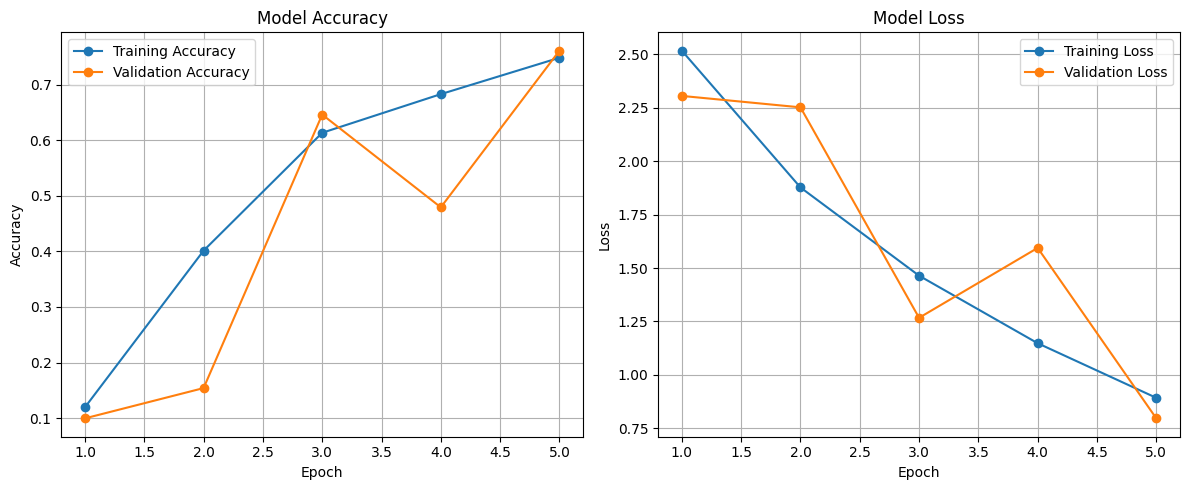

In [ ]:
import matplotlib.pyplot as plt

# Official final metrics from training logs
train_acc = [0.1195, 0.4015, 0.6137, 0.6833, 0.7488]
val_acc = [0.0995, 0.1540, 0.6465, 0.4795, 0.7615]

train_loss = [2.5177, 1.8774, 1.4641, 1.1478, 0.8921]
val_loss = [2.3060, 2.2525, 1.2669, 1.5942, 0.7961]

epochs = range(1, 6)

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()  # this will open a file picker


Saving efficientnet_food_classifier_10classes_v1.h5 to efficientnet_food_classifier_10classes_v1.h5


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('efficientnet_food_classifier_10classes_v1.h5')
print("Model loaded successfully!")


Model loaded successfully! 🧠✨


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# CLASS NAMES — match your training set!
class_names = ['garlic_bread', 'filet_mignon', 'tiramisu', 'croque_madame', 'crab_cakes',
               'frozen_yogurt', 'macaroni_and_cheese', 'cheesecake', 'fish_and_chips', 'nachos']

def test_image():
    print("Upload a food image to test:")
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    # Preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Make prediction
    preds = model.predict(img_batch)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds)

    # Display result
    plt.imshow(img)
    plt.title(f"Prediction: {class_names[predicted_class]} ({confidence*100:.2f}%)")
    plt.axis("off")
    plt.show()

    # Show Top-3 Predictions
    print("\nTop 3 Predictions:")
    top_indices = preds[0].argsort()[-3:][::-1]
    for i in top_indices:
      print(f"👉 {class_names[i]}: {preds[0][i]*100:.2f}%")



📸 Upload a food image to test:


Saving Nachos-cheese.jpg to Nachos-cheese (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


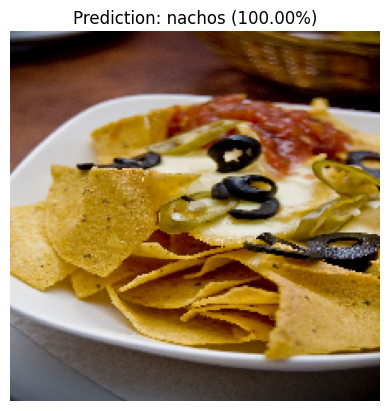


Top 3 Predictions:
👉 nachos: 100.00%
👉 fish_and_chips: 0.00%
👉 cheesecake: 0.00%


In [ ]:
test_image()


In [ ]:
#printing the first five classes
data_dir = '/content/food-101/images'
all_classes = sorted(os.listdir(data_dir))
print(f"Total available classes: {len(all_classes)}")
print("Here are the first 50 classes:\n")
print(all_classes[:50])


Total available classes: 101
Here are the first 50 classes:

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich']


In [ ]:
selected_classes = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla',
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder',
    'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes'
]


In [ ]:
#copying first thirty classes to a new folder
import shutil

subset_dir = '/content/food_30_subset'
os.makedirs(subset_dir, exist_ok=True)

for class_name in selected_classes:
    src = os.path.join(data_dir, class_name)
    dst = os.path.join(subset_dir, class_name)
    shutil.copytree(src, dst, dirs_exist_ok=True)

print("Copied 30 class folders to:", subset_dir)


Copied 30 class folders to: /content/food_30_subset


In [ ]:
#ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

#training generator
train_gen = train_datagen.flow_from_directory(
    '/content/food_30_subset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

#validation generator
val_gen = train_datagen.flow_from_directory(
    '/content/food_30_subset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 24000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.


In [ ]:
#loading base model without top layer
base_model = EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
base_model.trainable = False  # freezing for now

#building the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(30, activation='softmax')  # 30 classes 🔥
])

#compiing
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model built and compiled!")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Model built and compiled!


In [ ]:
#training the model with frozen base (feature extraction phase)
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,  #starting with 5 for now
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2321s 3s/step - accuracy: 0.0324 - loss: 3.4180 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2335s 3s/step - accuracy: 0.0315 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2305s 3s/step - accuracy: 0.0296 - loss: 3.4016 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2319s 3s/step - accuracy: 0.0320 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2262s 3s/step - accuracy: 0.0321 - loss: 3.4015 - val_accuracy: 0.0333 - val_loss: 3.4012


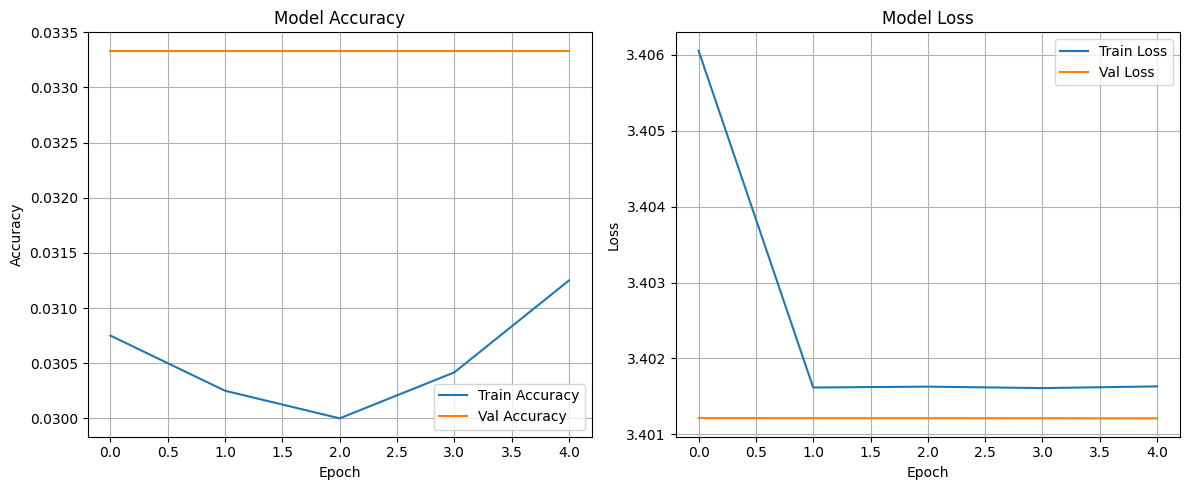

In [ ]:
import matplotlib.pyplot as plt

#plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

#plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
class_names = list(train_gen.class_indices.keys())


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def test_image():
    uploaded = files.upload()
    img_path = list(uploaded.keys())[0]

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    preds = model.predict(img_batch)
    top_3 = preds[0].argsort()[-3:][::-1]

    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    print("\n🔮 Top Predictions:")
    for i in top_3:
        print(f"{class_names[i]}: {preds[0][i]*100:.2f}%")


Saving cupcake.jpg to cupcake.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


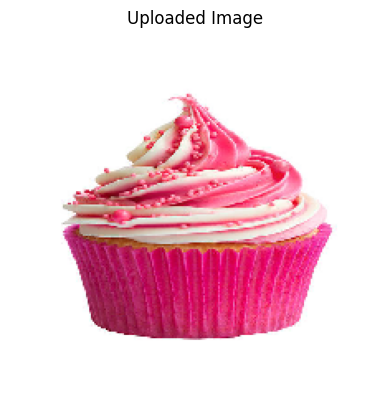


🔮 Top Predictions:
crab_cakes: 3.38%
bruschetta: 3.36%
cup_cakes: 3.36%


In [ ]:
test_image()


In [ ]:
model.save('efficientnet_30class_frozen.h5')


In [ ]:
from google.colab import files
files.download('efficientnet_30class_frozen.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Check GPU
!nvidia-smi

# Check RAM
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print(f"\nYour runtime has {ram_gb:.1f} GB of RAM")


Wed May 14 13:24:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [5]:
import os
import shutil
import random

original_dataset_path = '/content/food-101/images'
subset_path = '/content/food101_subset_5class'

selected_classes = ['pizza', 'cheesecake', 'cup_cakes', 'garlic_bread', 'sushi']
samples_per_class = 500  #400 train, 100 val

#removing old if exists
if os.path.exists(subset_path):
    shutil.rmtree(subset_path)

#creating folders
for split in ['train', 'val']:
    for cls in selected_classes:
        os.makedirs(os.path.join(subset_path, split, cls), exist_ok=True)

#copying images
for cls in selected_classes:
    cls_path = os.path.join(original_dataset_path, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    for i, img in enumerate(images[:samples_per_class]):
        split = 'train' if i < 400 else 'val'
        src = os.path.join(cls_path, img)
        dst = os.path.join(subset_path, split, cls, img)
        shutil.copyfile(src, dst)

print(f"5-class subset created at: {subset_path}")


5-class subset created at: /content/food101_subset_5class


In [6]:
#importing the ImageDataGenerator class from Keras — used to load and preprocess images as we go
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#defining the image size that EfficientNet expects (EfficientNetB0 expects 224x224)
img_size = 224

#defining batch size — how many images will be processed together in one go during training
batch_size = 32

#creating a data generator for the training set
#It rescales pixel values from 0-255 to 0-1 (normalization), which helps training
#No augmentation for now, just pure rescaling for a baseline run
train_datagen = ImageDataGenerator(rescale=1./255)

#same for validation set — only rescaling, no augmentation or distortion
val_datagen = ImageDataGenerator(rescale=1./255)

#creating the actual training generator
#flow_from_directory automatically reads images from subfolders (1 folder = 1 class)
#It returns batches of (image, label) pairs ready for training
train_generator = train_datagen.flow_from_directory(
    '/content/food101_subset_5class/train',  #path to the training folder
    target_size=(img_size, img_size),        #resize all images to 224x224
    batch_size=batch_size,                   #number of images per batch
    class_mode='categorical'                 #multi-class classification → one-hot encoded labels
)

#same for the validation generator
val_generator = val_datagen.flow_from_directory(
    '/content/food101_subset_5class/val',    #path to the validation folder
    target_size=(img_size, img_size),        #resize all images to 224x224
    batch_size=batch_size,                   #same batch size
    class_mode='categorical'                 #again, one-hot encoded outputs
)


Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
#importing relevant libraries from Keras
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#loading the EfficientNetB0 base model
# - include_top=False → we remove the original classification head
# - weights='imagenet' → use pretrained weights from ImageNet
# - input_shape → images are 224x224x3 (RGB)
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

#freezing the base model (i.e., the EfficientNet backbone)
#no changes will be made to these pretrained weights during training
base_model.trainable = False

#adding custom layers on top of the frozen base
# - GlobalAveragePooling2D - flattens the feature maps into a single vector per image
# - Dense(128) - fully connected layer to learn patterns
# - Dense(5) - final output layer with 5 neurons for 5 classes (softmax = multi-class probabilities)
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

#defining the full model (EfficientNet base + custom head)
model = Model(inputs=base_model.input, outputs=output_layer)

#compiling the model
#Adam optimizer is a good default
#Categorical crossentropy because we're doing multi-class classification
#tracking accuracy during training
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
#training the model with the frozen EfficientNet base
#only the top dense layers will get updated
#we'll train for 5 epochs to get a quick baseline performance

history_frozen = model.fit(
    train_generator,             #training images
    validation_data=val_generator,  #validation images
    epochs=5                     #training for 5 epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 650ms/step - accuracy: 0.1942 - loss: 1.6474 - val_accuracy: 0.2000 - val_loss: 1.6155
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.2138 - loss: 1.6180 - val_accuracy: 0.2000 - val_loss: 1.6231
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.2139 - loss: 1.6142 - val_accuracy: 0.2000 - val_loss: 1.6114
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.1992 - loss: 1.6120 - val_accuracy: 0.2000 - val_loss: 1.6093
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.2111 - loss: 1.6108 - val_accuracy: 0.2000 - val_loss: 1.6095


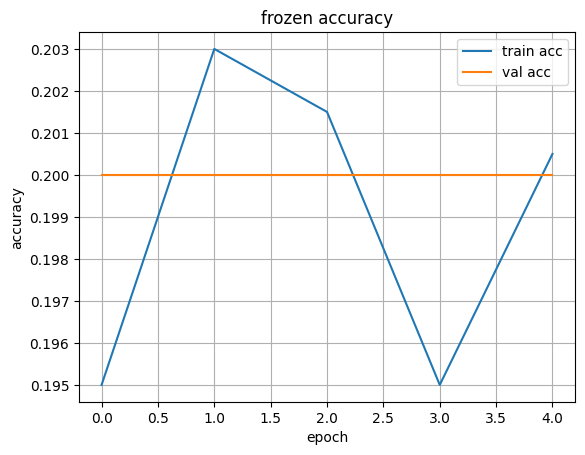

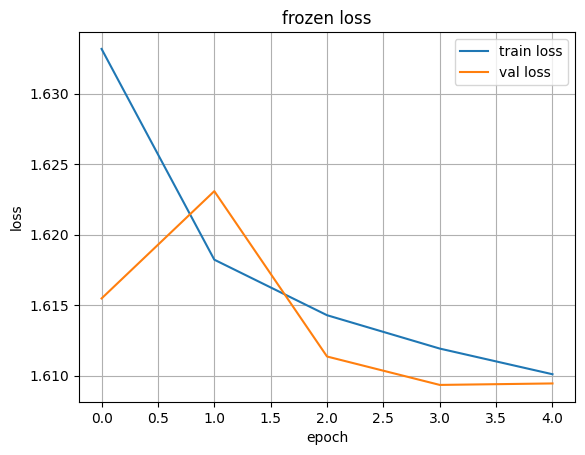

In [9]:
import matplotlib.pyplot as plt

#plotting training vs validation accuracy and loss
def plot_training_history(history, title):
    #accuracy plot
    plt.figure()
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(f'{title} accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    #loss plot
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.grid(True)
    plt.show()

#calling the function for frozen training phase
plot_training_history(history_frozen, "frozen")


In [12]:
#unfreezing the base model so the entire EfficientNet can learn
base_model.trainable = True

#recompiling the model with a smaller learning rate
#fine-tuning the whole model needs a smaller lr to avoid ruining pretrained weights
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#training the model again, now with the base unfrozen
#8 epochs
history_unfrozen = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=8
)


Epoch 1/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 138s 912ms/step - accuracy: 0.1994 - loss: 1.8246 - val_accuracy: 0.2020 - val_loss: 1.6089
Epoch 2/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.3390 - loss: 1.4882 - val_accuracy: 0.2060 - val_loss: 1.6092
Epoch 3/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5090 - loss: 1.3012 - val_accuracy: 0.1480 - val_loss: 1.6119
Epoch 4/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6596 - loss: 1.1136 - val_accuracy: 0.1760 - val_loss: 1.6126
Epoch 5/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.7181 - loss: 0.9800 - val_accuracy: 0.1800 - val_loss: 1.6112
Epoch 6/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7761 - loss: 0.8507 - val_accuracy: 0.2100 - val_loss: 1.6162
Epoch 7/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7777 - loss: 0.7629 - val_accuracy: 0.3000 - val_loss: 1.5791
Epoch 8/8
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8144 - loss: 0.6692 - val_accuracy: 0.3980 - val_lo

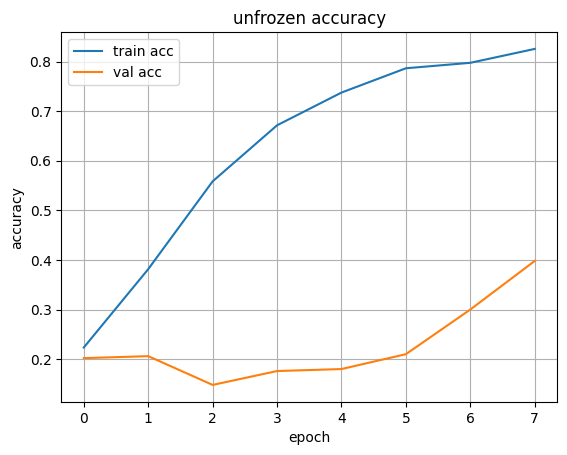

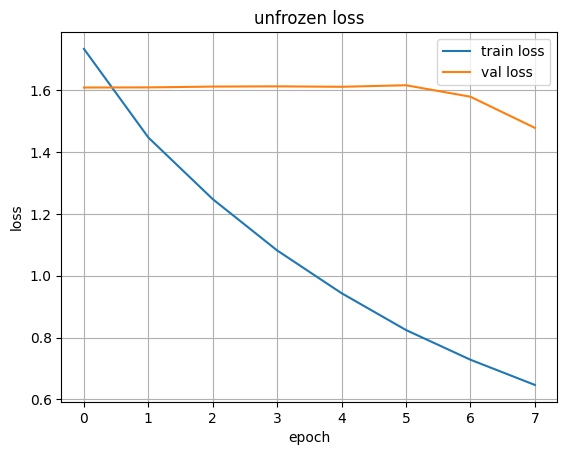

In [13]:
#plotting accuracy and loss after fine-tuning
plot_training_history(history_unfrozen, "unfrozen")

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 459ms/step
              precision    recall  f1-score   support

  cheesecake       0.22      0.29      0.25       100
   cup_cakes       0.16      0.16      0.16       100
garlic_bread       0.21      0.25      0.23       100
       pizza       0.22      0.25      0.24       100
       sushi       0.20      0.08      0.11       100

    accuracy                           0.21       500
   macro avg       0.20      0.21      0.20       500
weighted avg       0.20      0.21      0.20       500



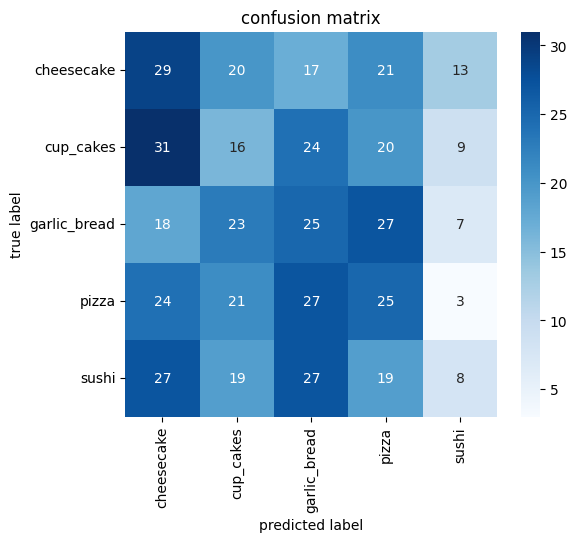

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#getting true labels from the generator
y_true = val_generator.classes

#predicting on validation images
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

#class labels
class_labels = list(val_generator.class_indices.keys())

#printing classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

#plotting confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()
